## 실습2

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

mnist_train 길이 :  60000
mnist_test 길이 :  10000
image data 형태 :  torch.Size([1, 28, 28])
label :  5


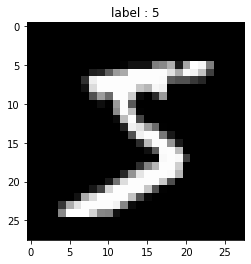

In [3]:
print("mnist_train 길이 : ", len(mnist_train))
print("mnist_test 길이 : ", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태 : ", image.size())
print("label : ", label)

img = image.numpy()
plt.title("label : {}".format(label))
plt.imshow(img[0],cmap='gray')
plt.show()

In [4]:
batch_size = 1024
learning_rate = 0.01
num_epoch = 400

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size,
                                          shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size,
                                          shuffle=False, num_workers=2, drop_last=True)

[0]
한번에 로드 데이터 크기 :  1024


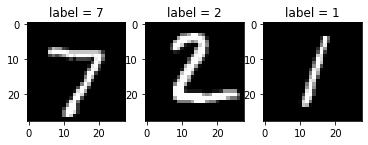

[1]
한번에 로드 데이터 크기 :  1024


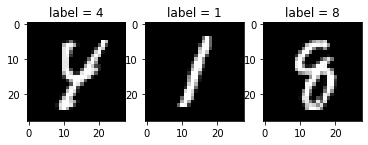

[2]
한번에 로드 데이터 크기 :  1024


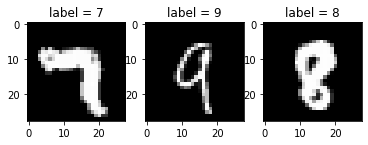

[3]
한번에 로드 데이터 크기 :  1024


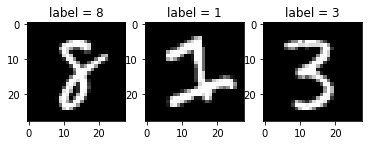

[4]
한번에 로드 데이터 크기 :  1024


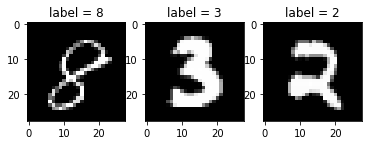

[5]
한번에 로드 데이터 크기 :  1024


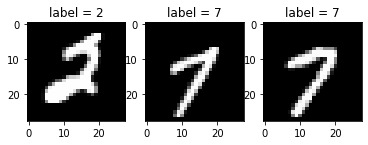

In [6]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
    if i>5:
        break
    print("[{}]".format(i))
    print("한번에 로드 데이터 크기 : ", len(imgs))
    
    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2]))
        
        plt.subplot(1,n,j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label = %d"%labels[j])
    plt.show()

In [7]:
model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512,256),
            nn.Linear(256,10),
) # 784*512*256*10

In [8]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = imgs
        label = Variable(labels)
        
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)
        
        output = imodel(img)
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("ACC : {}".format(100*correct/total))

In [9]:
ComputeAccr(test_loader, model) # not trained

ACC : 10.06944465637207


In [10]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)